# New App Recommendations

### What the project is about?
This project focuses on analysing mobile app data from the Apple App Store and Google Play Store. As a product analyst for a company that develops Android and iOS apps, our goal is to identify the types of apps most likely attract a large number of users.

### The goal of this project -
Since we only build apps that are free to download and install, our revenue comes from the in-app advertisements - the more users who see and engage with the ads, the better. 

Our goal for this project is to analyze the data to help our developers understand what types of apps are likely to attract more users.

### Exploring the Data

We will create a function named explore_data() which we can use repeatedly to print rows from our data sets in a a readable way. We will also include the option to show the rows and columns for any dataset.

Using the created explore_data function, we will explore the App Store dataset and the Google Play store dataset. 

In [1]:
import csv
%pip install matplotlib
import matplotlib.pyplot as plt

# Reading AppStore data
appStore = open('AppleStore.csv', newline='',encoding = 'utf8')
app_store_data = list(csv.reader(appStore))

# Reading PlayStore data
playStore = open('googleplaystore.csv', newline='',encoding = 'utf8')
google_store_data = list(csv.reader(playStore))


def explore_data(dataset, start, end, rows_and_columns=True):
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')
    
    if rows_and_columns:
        print('number of rows: ', len(dataset))
        print('number of columns: ', len(dataset[0]))
    


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python3.13 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### AppStore

In [2]:
explore_data(app_store_data, 0,5)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


number of rows:  7198
number of columns:  16


The app store data have 7197 iOS apps and 16 columns. The columns that will most likely be interest of us include 'track_name','price','rating_count_tot','user_rating','prime_genre'.

### PlayStore

In [3]:
explore_data(google_store_data,0,5)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


number of rows:  10842
number of columns:  13


Google play store have 10841 android apps and 13 columns. The columns that will most likely useful to us include 'App','Category','Reviews','Installs','Price','Genres'.

### Deleting Wrong Data ( Having Missing Values )

In [4]:
# deleting wrong data
index_to_be_removed = []
for row in google_store_data:
    if len(row)!=len(google_store_data[0]):
        index = google_store_data.index(row)
        print(row)
        print('\n')
        index_to_be_removed.append(index)
  

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']




In [5]:
print(index_to_be_removed)

[10473]


In [6]:
for idx in index_to_be_removed:
    del google_store_data[idx]
    print("Index deleted successfully: ", idx)

Index deleted successfully:  10473


### Removing Duplicates

As we explored the data further found that data contains duplicate rows for the same app, if you see the below cell's output, app name 'Slack' have 3 entries.

In [7]:
# printing duplicate rows for an app
for row in google_store_data:
    if row[0] == 'Slack':
        print(row)
        print('\n')


['Slack', 'BUSINESS', '4.4', '51507', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'August 2, 2018', 'Varies with device', 'Varies with device']


['Slack', 'BUSINESS', '4.4', '51507', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'August 2, 2018', 'Varies with device', 'Varies with device']


['Slack', 'BUSINESS', '4.4', '51510', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'August 2, 2018', 'Varies with device', 'Varies with device']




In [8]:
# Count of unique_app rows and duplicate app rows
unique_apps = []
duplicate_apps = []

for row in google_store_data[1:]:
    if row[0] in unique_apps:
        duplicate_apps.append(row[0])
    else:
        unique_apps.append(row[0])

print("Unique Apps - ", len(unique_apps))
print("Duplicate Apps - ", len(duplicate_apps))

Unique Apps -  9659
Duplicate Apps -  1181


Even though there are duplicate rows for the app, there's a catch that "Rating" is different for some rows of the same app, which means that our data was captured on differemt timstamps.

Higher the rating more latest the data is, so instead of removing random duplicate rows for an app, we will remove the rest and keep the row with the highest number of reviews.

To accomplish that, we will need to:

- Create a dictionary that has the unique app name as a key and the highest number of reviews of that app as the value. 

In [9]:
# creating a dictionary to store single row for every app.

unique_app_data = {}

for row in google_store_data[1:]:
    app_name = row[0]
    ratings = row[3]
    if app_name not in unique_app_data:
        unique_app_data[app_name] = ratings
    else:
        if unique_app_data[app_name]< ratings:
            unique_app_data[app_name] = ratings

print(len(unique_app_data))
print(unique_app_data["Slack"])

9659
51510


After getting the highest ratings for every unique app.
1. Append the entire row to a list that will store latest record of all the apps.
2. Append the name of the apps to another list, this will us keep track of the apps that are already added.

In [10]:
google_store_unique_apps = []
already_added = []

for row in google_store_data[1:]:
    app_ratings = row[3]
    app_name = row[0]
    if app_name not in already_added and app_ratings == unique_app_data[app_name]:
        google_store_unique_apps.append(row)
        already_added.append(app_name)

print(len(google_store_unique_apps))

9659


### Removing Non English Apps

To check if an app is english or not we'll create a function that will check if we have a app_name that contains more than 3 non-english characters then it is a non-english app(that we need to remove).

A english character is defined if it comes in between the range of 0-127 (upper_range and lower_range inclusive)

In [11]:
def is_english(app_name):
    count = 0
    for ch in app_name:
        if ord(ch)>127:
            count+=1
        if count>3:
            return False
    
    return True

# Validating the function on random app_names
# app_names = ['Instagram','爱奇艺PPS -《欢乐颂2》电视剧热播','Docs To Go™ Free Office Suite','Instachat 😜']

# for app_name in app_names:
#     if is_english(app_name):
#         print("English")
#     else:
#         print("Non-English")

In [12]:
# Removing non-english apps from AppStore dataset
app_store_non_eng_df = []

for row in app_store_data[1:]:
    if is_english(row[1]):
        app_store_non_eng_df.append(row)
        
explore_data(app_store_non_eng_df, 0,3)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


number of rows:  6183
number of columns:  16


In [13]:
# removing non-english apps from google_store_unique_apps

google_store_non_eng_df = []

for row in google_store_unique_apps:
    if is_english(row[0]):
        google_store_non_eng_df.append(row)

explore_data(google_store_non_eng_df, 0,3)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


number of rows:  9614
number of columns:  13


We have 6183 apps left in the app store dataset and 9614 apps left in the google play store dataset.

### Isolating the Free Apps

In [14]:
# Removing Non-Free Apps from each dataset

app_store_free_apps = []

for row in app_store_non_eng_df:
    app_price = row[4]
    if app_price == '0' or app_price == '0.0' or app_price == '$0.00':
        app_store_free_apps.append(row)

        
google_store_free_apps = []

for row in google_store_non_eng_df:
    app_price = row[7]
    if app_price == '0' or app_price == '0.0' or app_price == '$0.00':
        google_store_free_apps.append(row)

print(len(app_store_free_apps))
print(len(google_store_free_apps))

3222
8862


After isolating the free apps, we have 3222 apps left in the App Store dataset and 8862 apps in the Google Play Store dataset.


We are analysing the data on the basis of company generating revenue from in-app ads, so we need to make sure that the apps are most liked by the users.

Our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful in both markets.

Our validation strategy for building a app will be:-
1. Build a minimal version of the app, add it to the "Google Play Store".
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

In [15]:
# Helper Function to get count(frequency) of apps build in each genre/category.
def freq_table(dataset, index):
    freq_dict = {}
    total = 0
    
    for row in dataset:
        total += 1
        genre = row[index]
        
        if genre in freq_dict:
            freq_dict[genre] = freq_dict[genre] + 1
        else:
            freq_dict[genre] = 1
            
    percentage_freq = {}
    for key in freq_dict:
        percentage = (freq_dict[key] / total) * 100
        percentage_freq[key] = percentage
    return percentage_freq

In [16]:
app_store_genre_freq = freq_table(app_store_free_apps,11)
google_store_genre_freq = freq_table(google_store_free_apps,1)
google_store_cat_freq = freq_table(google_store_free_apps,9)
app_store_genre_freq

{'Social Networking': 3.2898820608317814,
 'Photo & Video': 4.9658597144630665,
 'Games': 58.16263190564867,
 'Music': 2.0484171322160147,
 'Reference': 0.5586592178770949,
 'Health & Fitness': 2.0173805090006205,
 'Weather': 0.8690254500310366,
 'Utilities': 2.5139664804469275,
 'Travel': 1.2414649286157666,
 'Shopping': 2.60707635009311,
 'News': 1.3345747982619491,
 'Navigation': 0.186219739292365,
 'Lifestyle': 1.5828677839851024,
 'Entertainment': 7.883302296710118,
 'Food & Drink': 0.8069522036002483,
 'Sports': 2.1415270018621975,
 'Book': 0.4345127250155183,
 'Finance': 1.1173184357541899,
 'Education': 3.662321539416512,
 'Productivity': 1.7380509000620732,
 'Business': 0.5276225946617008,
 'Catalogs': 0.12414649286157665,
 'Medical': 0.186219739292365}

In [17]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []

    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    # sort values
    table_sorted = sorted(table_display, reverse=True)

    # separate keys and values
    values = [item[0] for item in table_sorted]
    labels = [item[1] for item in table_sorted]

    # plot bar chart
    plt.figure(figsize=(12,6))
    plt.bar(labels, values, color="green")
    plt.xticks(rotation=90)
    plt.xlabel("Genre")
    plt.ylabel("App Frequency Percentage")
    plt.title("App Frequency per Genre/Category")
    plt.tight_layout()
    plt.show()

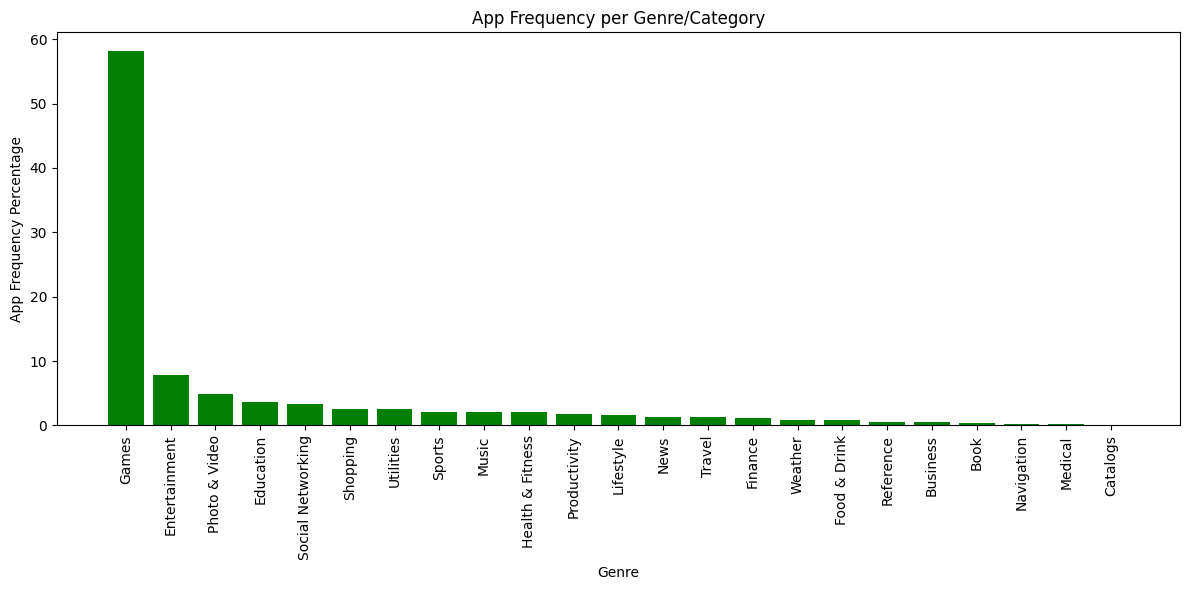

In [18]:
display_table(app_store_free_apps,11)

### App Store

When we analyse the pattern of these apps, we see that the most common genre is Games (58.16%), more than half of the ps belongs to the Games genre. Entertainment is the second most common genre(7.88%), followed by Photo & Video (4.96%), and Education(3.66%).

We can deduce that most of the apps are designed for fun (games, photo and video, social networking, sports, music),  while the apps for pratical purposes (education, shopping, utilities, productivity, lifestyle) are fewer.

Though the fun apps are more in number, we cannot recommend an app profile for the App Store market based on this alone. Having a large number of apps does not translate into having a large number of users. We need more information to give a proper recommendation. 

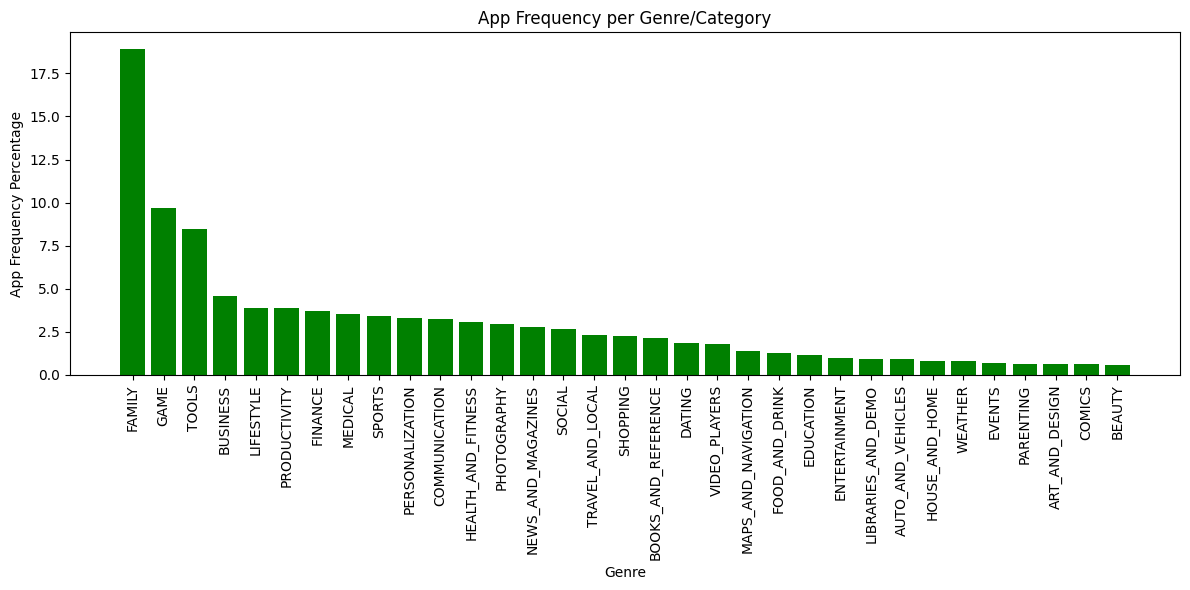

In [19]:
display_table(google_store_free_apps,1)

### Google Store Category

The most common category is Family (18.91%). Games is the second most common (9.70%), followed by Tools (8.46%) and Business (4.59%). From the above, We can see that there are more apps for practical purposes than those for fun. 


Here we see the pattern that most of the apps are of practical type - Tools, Business, Finance, Productivity,etc. Here the apps are in balanced landscape.
We cannot recommend an App Profile just by looking at the count of the apps built.

### Understanding - 
The frequency table that we analyze shows that apps designed for fun dominate the App Store, whereas Google Play Store is more balanced landscape of both practical and fun apps.

### Most Popular Apps by Genre on the App Store

We can find out the most popular genre by calculating the average number of installs for each app genre. We will take the total number of user ratings as a proxy, which we can find in the rating_count_tot column of AppStore dataset

Social Networking : 71548.34905660378 : 7584125.0
Photo & Video : 28441.54375 : 4550647.0
Games : 22788.6696905016 : 42705967.0
Music : 57326.530303030304 : 3783551.0
Reference : 74942.11111111111 : 1348958.0
Health & Fitness : 23298.015384615384 : 1514371.0
Weather : 52279.892857142855 : 1463837.0
Utilities : 18684.456790123455 : 1513441.0
Travel : 28243.8 : 1129752.0
Shopping : 26919.690476190477 : 2261254.0
News : 21248.023255813954 : 913665.0
Navigation : 86090.33333333333 : 516542.0
Lifestyle : 16485.764705882353 : 840774.0
Entertainment : 14029.830708661417 : 3563577.0
Food & Drink : 33333.92307692308 : 866682.0
Sports : 23008.898550724636 : 1587614.0
Book : 39758.5 : 556619.0
Finance : 31467.944444444445 : 1132846.0
Education : 7003.983050847458 : 826470.0
Productivity : 21028.410714285714 : 1177591.0
Business : 7491.117647058823 : 127349.0
Catalogs : 4004.0 : 16016.0
Medical : 612.0 : 3672.0


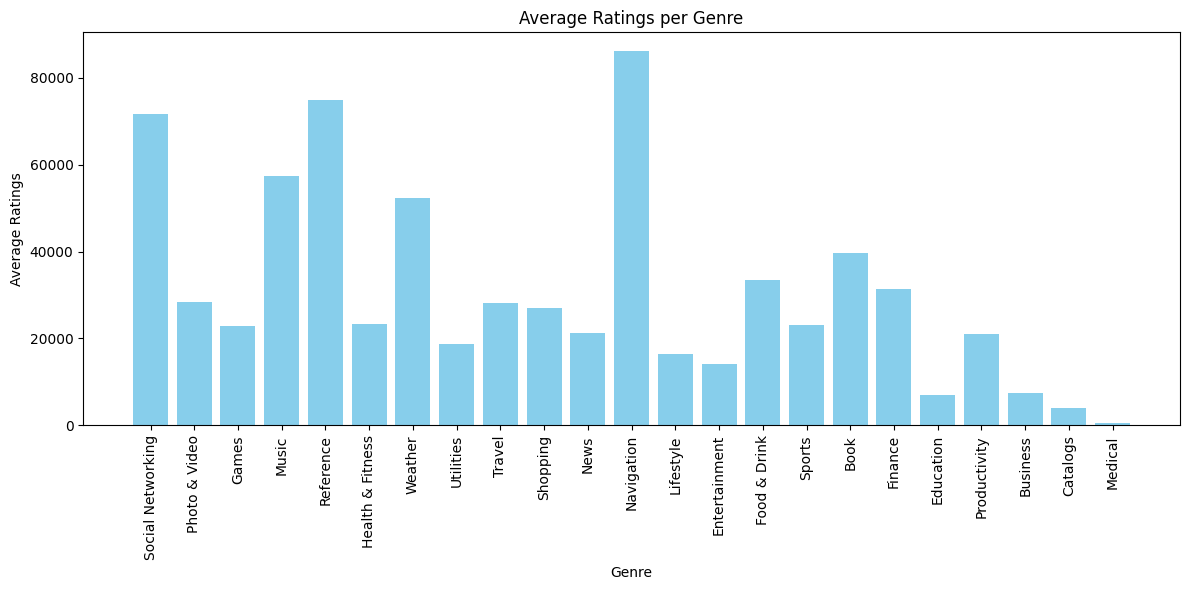

In [44]:
# Let's determine the app kinds with most users.


# compute totals per genre
genres = []
average_ratings = []

for row in app_store_genre_freq:
    prime_genre = row
    count_of_users = 0
    gen_len = 0
    for app in app_store_free_apps:
        genre = app[11]   # genre column
        if genre == prime_genre:
            gen_len += 1
            count_of_users += float(app[5])  # users column?
    
    if gen_len > 0:
        avg_rating = count_of_users / gen_len
        print(prime_genre, ':' , avg_rating, ':' , count_of_users)
        genres.append(prime_genre)
        average_ratings.append(avg_rating)

# plot bar chart
plt.figure(figsize=(12,6))
plt.bar(genres, average_ratings, color="skyblue")
plt.xlabel("Genre")
plt.ylabel("Average Ratings")
plt.title("Average Ratings per Genre")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Apps under the 'Navigation' genre have the highest number of reviews. followed by Reference, Social Networking, Music and Weather. 

Let's take a closer look into the apps under Navigation

In [21]:
for app in app_store_free_apps:
    if app[11] == 'Navigation':
        print(app[1], ':', app[5])

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


Here, we see that Navigation is mostly dominated by Waze and Google Maps aaps, Though navigation has a small audience, it stands out in user satisfaction. Let's check the distribution of 'Reference' apps.

In [22]:
for app in app_store_free_apps:
    if app[11] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


Bible and Dictionary apps skew up the ratings of the 'Reference' genre, the distribution of the other apps doesn't come close. Let's check the 'Social Networking' genre and compare.

In [23]:
top_20_social_apps = []
count = 0
for app in app_store_free_apps:
    if app[11] == 'Social Networking':
        if count <20:
            count+=1
            top_20_social_apps.append(app)

for app in top_20_social_apps:
    print(app[1], ':', app[5])

Facebook : 2974676
Pinterest : 1061624
Skype for iPhone : 373519
Messenger : 351466
Tumblr : 334293
WhatsApp Messenger : 287589
Kik : 260965
ooVoo – Free Video Call, Text and Voice : 177501
TextNow - Unlimited Text + Calls : 164963
Viber Messenger – Text & Call : 164249
Followers - Social Analytics For Instagram : 112778
MeetMe - Chat and Meet New People : 97072
We Heart It - Fashion, wallpapers, quotes, tattoos : 90414
InsTrack for Instagram - Analytics Plus More : 85535
Tango - Free Video Call, Voice and Chat : 75412
LinkedIn : 71856
Match™ - #1 Dating App. : 60659
Skype for iPad : 60163
POF - Best Dating App for Conversations : 52642
Timehop : 49510


Social Networking strikes a balance between popularity and satisfaction. It comes at the 2nd place in most popular genres and 3rd place in highest average ratings. However it is a difficult genre to compete as their are giants dominating this category. Let's check anyother genre.

In [24]:
for app in app_store_free_apps:
    if app[11] == 'Music':
        print(app[1], ':', app[5])

Pandora - Music & Radio : 1126879
Spotify Music : 878563
Shazam - Discover music, artists, videos & lyrics : 402925
iHeartRadio – Free Music & Radio Stations : 293228
SoundCloud - Music & Audio : 135744
Magic Piano by Smule : 131695
Smule Sing! : 119316
TuneIn Radio - MLB NBA Audiobooks Podcasts Music : 110420
Amazon Music : 106235
SoundHound Song Search & Music Player : 82602
Sonos Controller : 48905
Bandsintown Concerts : 30845
Karaoke - Sing Karaoke, Unlimited Songs! : 28606
My Mixtapez Music : 26286
Sing Karaoke Songs Unlimited with StarMaker : 26227
Ringtones for iPhone & Ringtone Maker : 25403
Musi - Unlimited Music For YouTube : 25193
AutoRap by Smule : 18202
Spinrilla - Mixtapes For Free : 15053
Napster - Top Music & Radio : 14268
edjing Mix:DJ turntable to remix and scratch music : 13580
Free Music - MP3 Streamer & Playlist Manager Pro : 13443
Free Piano app by Yokee : 13016
Google Play Music : 10118
Certified Mixtapes - Hip Hop Albums & Mixtapes : 9975
TIDAL : 7398
YouTube Mu

In [25]:
for app in app_store_free_apps:
    if app[11] == 'Book':
        print(app[1], ':', app[5])

Kindle – Read eBooks, Magazines & Textbooks : 252076
Audible – audio books, original series & podcasts : 105274
Color Therapy Adult Coloring Book for Adults : 84062
OverDrive – Library eBooks and Audiobooks : 65450
HOOKED - Chat Stories : 47829
BookShout: Read eBooks & Track Your Reading Goals : 879
Dr. Seuss Treasury — 50 best kids books : 451
Green Riding Hood : 392
Weirdwood Manor : 197
MangaZERO - comic reader : 9
ikouhoushi : 0
MangaTiara - love comic reader : 0
謎解き : 0
謎解き2016 : 0


In [26]:
high_rating = []
app_ratings = {}

for app in app_store_free_apps:
    rating = float(app[5])
    
    if rating >= 300000:
        high_rating.append(app)
        
        for app in high_rating:
            apps_rating = [app[1],app[5],app[11]]
        
        genre = apps_rating[2]
        if genre in app_ratings:
            app_ratings[genre] += 1
        else:
            app_ratings[genre] = 1

print(app_ratings)
        

{'Social Networking': 5, 'Photo & Video': 2, 'Games': 29, 'Music': 3, 'Reference': 1, 'Health & Fitness': 2, 'Weather': 1, 'Utilities': 1, 'Travel': 1, 'Shopping': 1, 'News': 1, 'Navigation': 1, 'Lifestyle': 1, 'Entertainment': 1, 'Food & Drink': 1}


After checking the representation of apps with ratings above 300000, the Health & Fitness genre seems to have some potential. There are not too many apps in the genre compared to Games and Socail Networking, yet it has two appearances in the top apps with ratings above 300000. 
Let's take a closer look at the Health & Fitness genre. 

In [27]:
for app in app_store_free_apps:
    if app[11] == 'Health & Fitness':
        print(app[1], ':', app[5]) 

Calorie Counter & Diet Tracker by MyFitnessPal : 507706
Lose It! – Weight Loss Program and Calorie Counter : 373835
Weight Watchers : 136833
Sleep Cycle alarm clock : 104539
Fitbit : 90496
Period Tracker Lite : 53620
Nike+ Training Club - Workouts & Fitness Plans : 33969
Plant Nanny - Water Reminder with Cute Plants : 27421
Sworkit - Custom Workouts for Exercise & Fitness : 16819
Clue Period Tracker: Period & Ovulation Tracker : 13436
Headspace : 12819
Fooducate - Lose Weight, Eat Healthy,Get Motivated : 11875
Runtastic Running, Jogging and Walking Tracker : 10298
WebMD for iPad : 9142
8fit - Workouts, meal plans and personal trainer : 8730
Garmin Connect™ Mobile : 8341
Record by Under Armour, connects with UA HealthBox : 7754
Fitstar Personal Trainer : 7496
My Cycles Period and Ovulation Tracker : 7469
Seven - 7 Minute Workout Training Challenge : 6808
RUNNING for weight loss: workout & meal plans : 6407
Lifesum – Inspiring healthy lifestyle app : 5795
Waterlogged - Daily Hydration Tr

The Health & Fitness Category is not over saturated and has potential as there is an increased growth in personal wellness, fitness tracking, mental health. Our engineers can create a niche app targetting a particular segment and revenue can be generated from subscriptions and in.app purchases. 

Now let's analyse the Google Play Store dataset 

### Most Popular Apps by Genre on Google Play Store

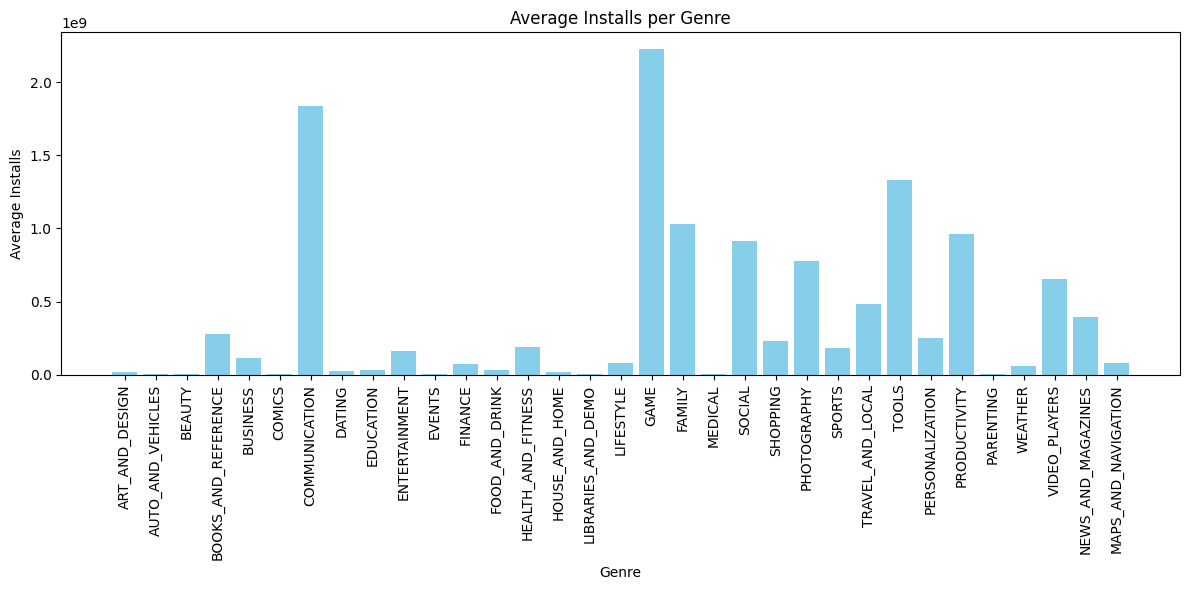

{'ART_AND_DESIGN': 1986335.0877192982,
 'AUTO_AND_VEHICLES': 647317.8170731707,
 'BEAUTY': 513151.88679245283,
 'BOOKS_AND_REFERENCE': 8767811.894736841,
 'BUSINESS': 1712290.1474201474,
 'COMICS': 817657.2727272727,
 'COMMUNICATION': 38456119.167247385,
 'DATING': 854028.8303030303,
 'EDUCATION': 1820673.076923077,
 'ENTERTAINMENT': 11640705.88235294,
 'EVENTS': 253542.22222222222,
 'FINANCE': 1387692.475609756,
 'FOOD_AND_DRINK': 1924897.7363636363,
 'HEALTH_AND_FITNESS': 4188821.9853479853,
 'HOUSE_AND_HOME': 1331540.5616438356,
 'LIBRARIES_AND_DEMO': 638503.734939759,
 'LIFESTYLE': 1437816.2687861272,
 'GAME': 15560965.599534342,
 'FAMILY': 3694276.334922527,
 'MEDICAL': 120616.48717948717,
 'SOCIAL': 23253652.127118643,
 'SHOPPING': 7036877.311557789,
 'PHOTOGRAPHY': 17805627.643678162,
 'SPORTS': 3638640.1428571427,
 'TRAVEL_AND_LOCAL': 13984077.710144928,
 'TOOLS': 10682301.033377837,
 'PERSONALIZATION': 5201482.6122448975,
 'PRODUCTIVITY': 16787331.344927534,
 'PARENTING': 5426

In [45]:
google_store_cat_users = {}

genres = []
average_installs = []

for row in google_store_genre_freq:
    cat_name = row
    count_of_users = 0
    cat_len = 0
    for row in google_store_free_apps:
        cat = row[1]
        ratings = row[5]
        if cat == cat_name:
            replaced_plus_icon = ratings.replace('+','')
            formatted_rating = float(replaced_plus_icon.replace(',',''))
            count_of_users += formatted_rating
            cat_len += 1
        
    if cat_len > 0:
        avg_installs = count_of_users / gen_len
        genres.append(cat_name)
        average_installs.append(avg_installs)
    
    google_store_cat_users[cat_name] = count_of_users/cat_len

plt.figure(figsize=(12,6))
plt.bar(genres, average_installs, color="skyblue")
plt.xlabel("Genre")
plt.ylabel("Average Installs")
plt.title("Average Installs per Genre")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

google_store_cat_users

Using the average, the communications category has the most installs with an average of 38,456,119. It is heavily skewed by apps that are hard to compete against like the Social Networking category in the App Store dataset. We can see that Whatsapp has over a billion installs. 

In [46]:
for app in google_store_free_apps:
     if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

If We remove the apps that have over a 100 million installs, we would see that the average has greatly reduced. 

In [47]:
under_100_m = []

for app in google_store_free_apps:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3603485.3884615386

We observe a similar trend in the Video Players category, which ranks second with 24,727,872 installs. This space is largely dominated by major players like YouTube, Google Play Movies & TV, and MX Player. The same pattern appears across other categories:

Social apps (e.g., Facebook, Instagram, Google+)

Photography (e.g., Google Photos, top photo editors)

Productivity (e.g., Microsoft Word, Dropbox, Google Calendar, Evernote)

In each case, a few dominant apps control the majority of the market, making it difficult for newcomers to gain traction. While these genres may appear highly popular, their visibility is skewed by the success of a small number of giants.

Similarly, although Games show high install numbers, we’ve previously found that this market is heavily saturated. For that reason, we’re inclined to explore alternative app categories with more room for innovation and growth.

The Health and Fitness genre category also shows promising popularity, with an average of 4,188,821 installs. This genre stands out as worth exploring further, especially since it appears to perform well on the App Store. Given our goal to identify an app category with strong profit potential across both the App Store and Google Play, this genre could be a viable candidate. 

Let's take a look at some of the apps from this genre and their number of installs:

In [48]:
for app in google_store_free_apps:
    if app[1] == 'HEALTH_AND_FITNESS':
        print(app[0], ':', app[5])

Step Counter - Calorie Counter : 500,000+
Lose Belly Fat in 30 Days - Flat Stomach : 5,000,000+
Pedometer - Step Counter Free & Calorie Burner : 1,000,000+
Six Pack in 30 Days - Abs Workout : 10,000,000+
Lose Weight in 30 Days : 10,000,000+
Pedometer : 10,000,000+
LG Health : 10,000,000+
Step Counter - Pedometer Free & Calorie Counter : 10,000,000+
Pedometer, Step Counter & Weight Loss Tracker App : 10,000,000+
Sportractive GPS Running Cycling Distance Tracker : 1,000,000+
30 Day Fitness Challenge - Workout at Home : 10,000,000+
Home Workout for Men - Bodybuilding : 1,000,000+
Fat Burning Workout - Home Weight lose : 100,000+
Buttocks and Abdomen : 500,000+
Walking for Weight Loss - Walk Tracker : 100,000+
Running & Jogging : 500,000+
Sleep Sounds : 1,000,000+
Fitbit : 10,000,000+
Lose Belly Fat-Home Abs Fitness Workout : 50,000+
Cycling - Bike Tracker : 500,000+
Abs Training-Burn belly fat : 100,000+
Calorie Counter - EasyFit free : 1,000,000+
Aunjai i lert u : 500,000+
Garmin Connect

The Health and Fitness category has a variety of apps for that address increasing popular focus currently like weight loss, sound sleep, mental health and many more. It seems there's still a small number of extremely popular apps that skew the average:

In [49]:
for app in google_store_free_apps:
    if app[1] == 'HEALTH_AND_FITNESS' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Period Tracker - Period Calendar Ovulation Tracker : 100,000,000+
Samsung Health : 500,000,000+


However, there are just two very popular apps. Thus, this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [50]:
for app in google_store_free_apps:
    if app[1] == 'HEALTH_AND_FITNESS' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Lose Belly Fat in 30 Days - Flat Stomach : 5,000,000+
Pedometer - Step Counter Free & Calorie Burner : 1,000,000+
Six Pack in 30 Days - Abs Workout : 10,000,000+
Lose Weight in 30 Days : 10,000,000+
Pedometer : 10,000,000+
LG Health : 10,000,000+
Step Counter - Pedometer Free & Calorie Counter : 10,000,000+
Pedometer, Step Counter & Weight Loss Tracker App : 10,000,000+
Sportractive GPS Running Cycling Distance Tracker : 1,000,000+
30 Day Fitness Challenge - Workout at Home : 10,000,000+
Home Workout for Men - Bodybuilding : 1,000,000+
Sleep Sounds : 1,000,000+
Fitbit : 10,000,000+
Calorie Counter - EasyFit free : 1,000,000+
Garmin Connect™ : 10,000,000+
BetterMe: Weight Loss Workouts : 5,000,000+
Bike Computer - GPS Cycling Tracker : 1,000,000+
Running Distance Tracker + : 1,000,000+
Runkeeper - GPS Track Run Walk : 10,000,000+
Walking: Pedometer diet : 1,000,000+
8fit Workouts & Meal Planner : 10,000,000+
Keep Trainer - Workout Trainer & Fitness Coach : 1,000,000+
PumpUp — Fitness Co

The niche seems to be dominated by apps for weight loss. It is not a good idea to build a similar app as there will be a lot of competition. 

Based on the above, I would recommend our engineers build a personalised habit coach app that is a hybrid of health and wellness. 

### Conclusion - 

In this project, we analyzed data from the iOS App Store and Google Play Store to identify a profitable app profile for both markets.

Our analysis showed consistent and growing user engagement with Health and Fitness apps across both platforms. Based on these insights, developing a personalized habit-coaching app that combines elements of health, wellness, and behavioral science to help users build sustainable habits.

This type of app aligns well with current trends in personal development and digital wellness, and it will offer long-term value by supporting users in areas such as fitness routines, sleep improvement, nutrition, mindfulness, and productivity. By offering a highly customized experience through features like daily check-ins, adaptive goal setting, and habit tracking, we can keep users engaged and motivated over time.

By focusing on user value first and building trust, we can encourage long-term engagement and gradual conversion to premium features, creating a healthy balance between user satisfaction and business profitability.